In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
data_dir = "/kaggle/input/task-03/train/train/"
img_size = 64

In [4]:
def load_data(directory):
    X, y = [], []
    
    print("[INFO] Loading images...")
    start_time = time.time()

    for file in os.listdir(directory):
        img_path = os.path.join(directory, file)

        # Read image and preprocess
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))  # Resize image
            features, _ = hog(img, pixels_per_cell=(8,8), cells_per_block=(2,2), visualize=True)  # Extract HOG features
            X.append(features)

            # Label: 'cat' images have 'cat' in filename, 'dog' images have 'dog'
            label = 0 if "cat" in file else 1
            y.append(label)

    print(f"[INFO] Dataset loaded in {time.time() - start_time:.2f} seconds.")
    return np.array(X), np.array(y)

In [5]:
X, y = load_data(data_dir)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("[INFO] Standardizing data...")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

[INFO] Loading images...
[INFO] Dataset loaded in 479.95 seconds.
[INFO] Standardizing data...


In [6]:
print("[INFO] Training SVM model...")
start_train = time.time()
svm_model = SVC(kernel="rbf", C=50, gamma="auto", class_weight="balanced", max_iter=20000)
svm_model.fit(X_train, y_train)
print(f"[INFO] Model trained in {time.time() - start_train:.2f} seconds.")

[INFO] Training SVM model...
[INFO] Model trained in 1048.69 seconds.


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [7]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7856

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78      2500
           1       0.78      0.79      0.79      2500

    accuracy                           0.79      5000
   macro avg       0.79      0.79      0.79      5000
weighted avg       0.79      0.79      0.79      5000



<function matplotlib.pyplot.show(close=None, block=None)>

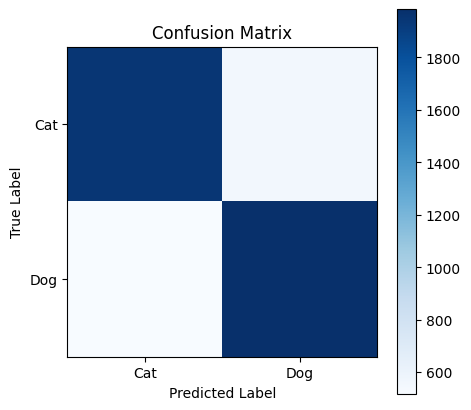

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.imshow(cm, cmap="Blues", interpolation="nearest")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(ticks=[0,1], labels=["Cat", "Dog"])
plt.yticks(ticks=[0,1], labels=["Cat", "Dog"])
plt.show